In [350]:
#IMport library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

#Skip the first 20 rows and the last 2 rows because they are just text not tabulated
df= pd.read_excel('Canada.xlsx',
     sheet_name ='Canada by Citizenship',
     skiprows=range(20),
     skipfooter=2
     )
print(df.head())

         Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623 

In [351]:
print(df.columns)

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')


In [352]:
#Dropping (Getting rid of) coulmns that are not of intrest.
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True, errors='ignore')
print(df.head())

           OdName AreaName          RegName             DevName  1980  1981  \
0     Afghanistan     Asia    Southern Asia  Developing regions    16    39   
1         Albania   Europe  Southern Europe   Developed regions     1     0   
2         Algeria   Africa  Northern Africa  Developing regions    80    67   
3  American Samoa  Oceania        Polynesia  Developing regions     0     1   
4         Andorra   Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2004  2005  2006  2007  2008  2009  2010  \
0    39    47    71   340  ...  2978  3436  3009  2652  2111  1746  1758   
1     0     0     0     0  ...  1450  1223   856   702   560   716   561   
2    71    69    63    44  ...  3616  3626  4807  3623  4005  5393  4752   
3     0     0     0     0  ...     0     0     1     0     0     0     0   
4     0     0     0     0  ...     0     0     1     1     0     0     0   

   2011  2012  2013  
0  2203  2635  2004  
1   539   620   603  
2 

In [353]:
#Renaming columns
df.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)
print(df.columns)

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')


In [354]:
#Add a 'Total' which is the total immigrants that came into canada from 1988 to 2013 frim each country
df['Total'] = df.sum(axis=1)

print(df.head())

          Country Continent           Region             DevName  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...  1223   856   702   560   716   561   539   
2    71    69    63    44  ...  3626  4807  3623  4005  5393  4752  4325   
3     0     0     0     0  ...     0     1     0     0     0     0     0   
4     0     0     0     0  ...     0     1     1     0     0     0     0   

   2012  2013  Total  
0  2635  2004  58639  
1   620   603  1

C:\Users\rikar\AppData\Local\Temp\ipykernel_33576\4019963311.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total'] = df.sum(axis=1)


In [355]:
#Set the country column as the index
df = df.set_index('Country')
print(df.head())

               Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Country                                       ...                           
Afghanistan       39    47    71   340   496  ...  3436  3009  2652  2111   
Albania            0     0     0     0     1  ...  1223   856   702   560   
Algeria           71    69    63    44    69  ...  3626  4807  3623  4005   
American Samoa     0     0     0     0     0  ...     0     1     0     0  

In [356]:
##Showing what plots are available
print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


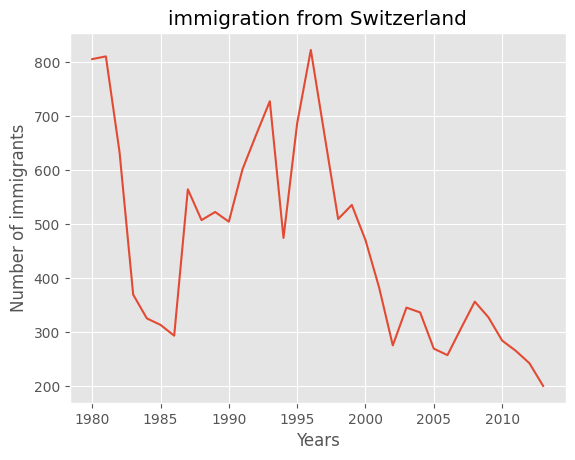

In [357]:
years = list(map(int, range (1980, 2014)))

df.loc['Switzerland', years] 
df.loc['Switzerland', years].plot()
plt.title('immigration from Switzerland')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

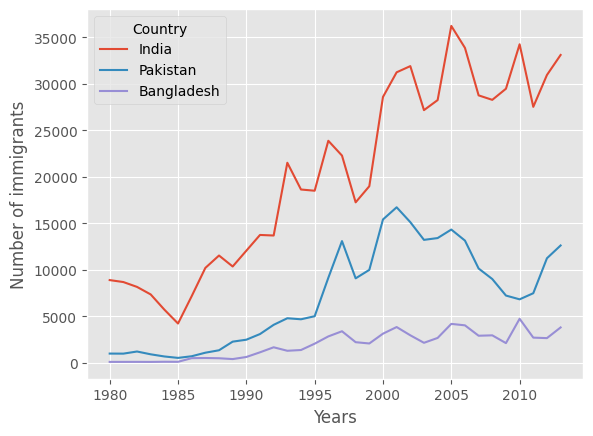

In [358]:
ind_pak_ban =df.loc[['India', 'Pakistan', 'Bangladesh'], years]
ind_pak_ban.head()
ind_pak_ban.T

ind_pak_ban.T.plot()
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

C:\Users\rikar\AppData\Local\Temp\ipykernel_33576\1904279975.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  count = df.groupby('Continent', axis=0).sum()


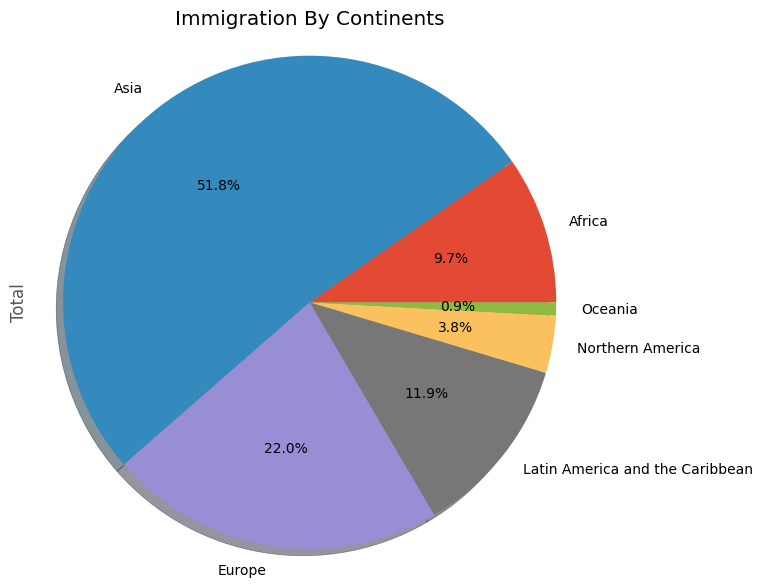

In [359]:
count = df.groupby('Continent', axis=0).sum()

count['Total'].plot(kind='pie', figsize=(7, 7),
                   autopct='%1.1f%%',
                   shadow=True)
plt.title('Immigration By Continents')
plt.axis('equal')
plt.show()

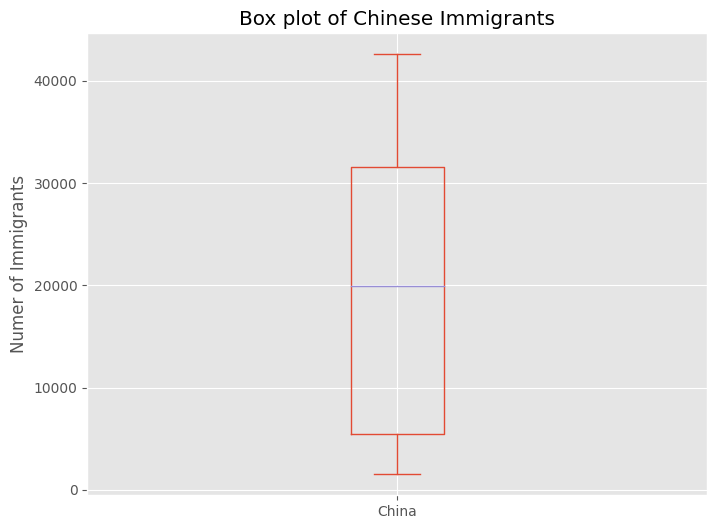

In [360]:
china = df.loc[['China'], years].T

china.plot(kind='box', figsize=(8, 6))
plt.title('Box plot of Chinese Immigrants')
plt.ylabel('Numer of Immigrants')
plt.show()

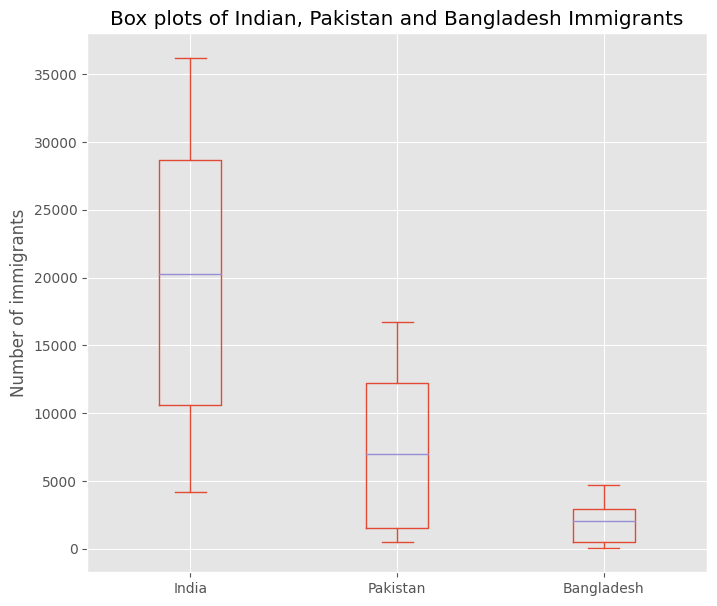

In [361]:
ind_pak_ban.T.plot(kind='box', figsize=(8, 7))
plt.title('Box plots of Indian, Pakistan and Bangladesh Immigrants')
plt.ylabel('Number of immigrants')
plt.show()

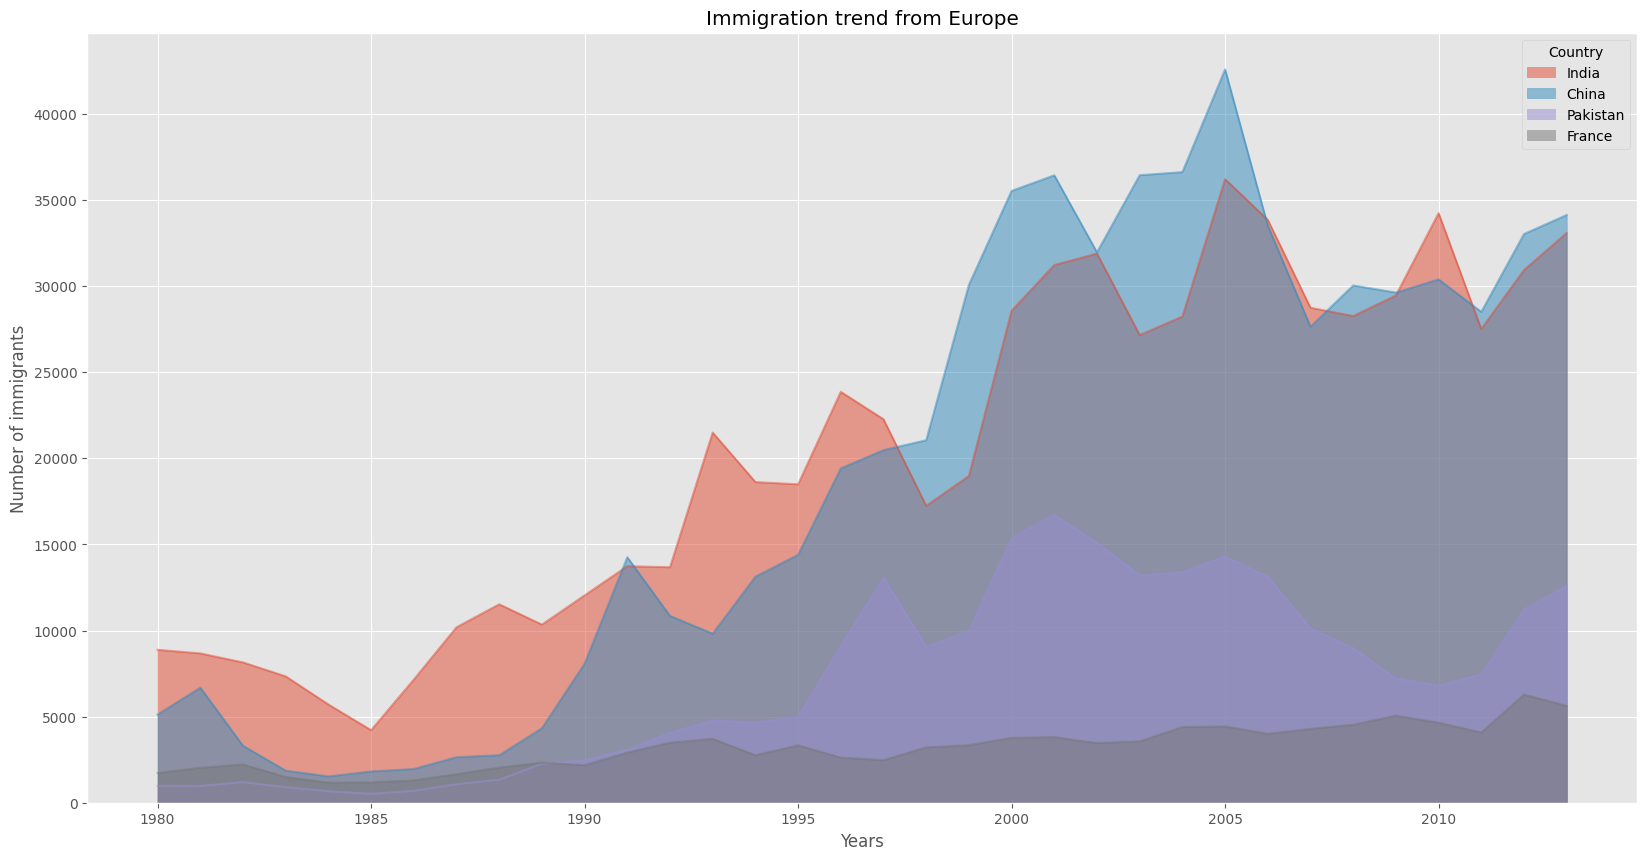

In [362]:
#Make a new datafram that will contain the years as an index and the total number of immigrants each year
totalPerYear = pd.DataFrame(df[years].sum(axis=0))
totalPerYear.head()
##print(totalPerYear.head())

#Need to convers the years to integers and polish the dataframe to make it presentable
totalPerYear.index= map(int, totalPerYear.index)
totalPerYear.reset_index(inplace =True)
totalPerYear.head()
##print(totalPerYear.head())

#Make datafram including the information of India, China, Pakistan, and France
top =df.loc[['India', 'China', 'Pakistan', 'France'], years]
top = top.T
##print(top)

colors =['Black', 'Green', 'Blue', 'Red']
top.plot(kind='area', stacked=False, figsize=(20,10))
plt.title('Immigration trend from Europe')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

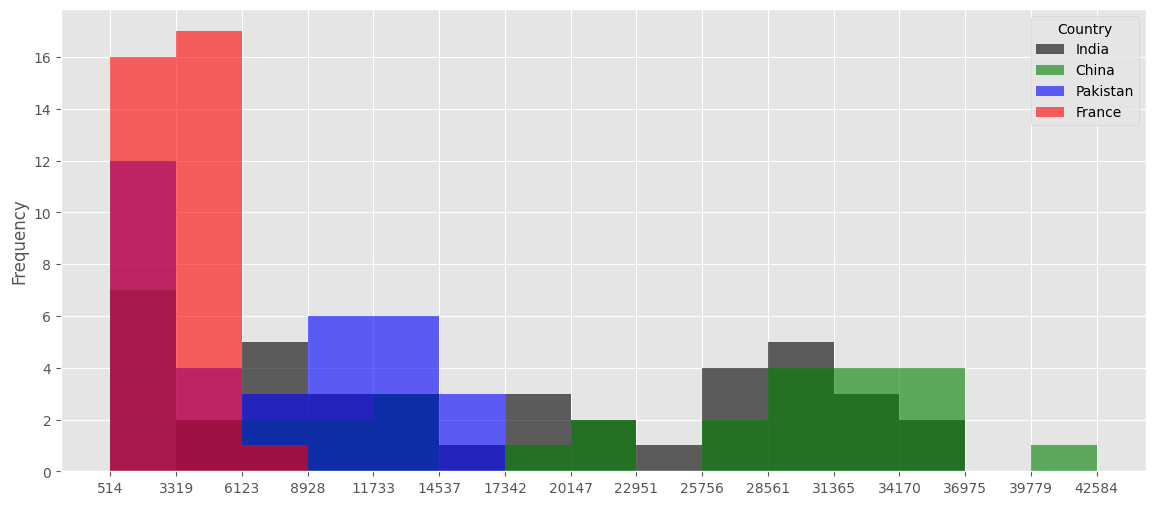

In [363]:
#Specify the number of bins and find out the bin edges
count, bin_edges = np.histogram(top, 15)
top.plot(kind='hist', figsize=(14,6), bins=15, alpha = 0.6,
       xticks=bin_edges, color=colors)

plt.show()

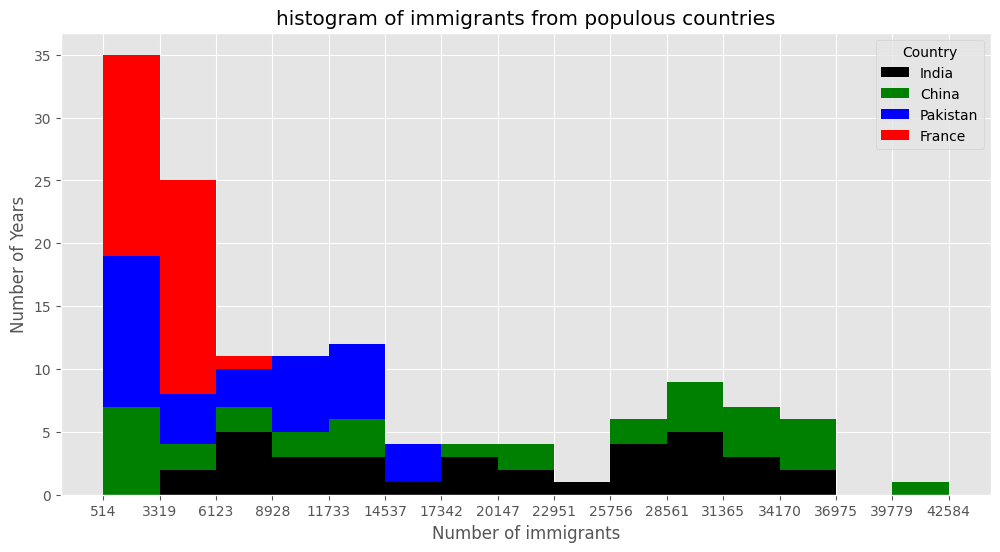

In [364]:
top.plot(kind='hist',
        figsize=(12,6),
        bins=15,
        xticks=bin_edges,
        color=colors,
        stacked=True
        )
plt.title('histogram of immigrants from populous countries')
plt.ylabel('Number of Years')
plt.xlabel('Number of immigrants')
plt.show()

Text(17, 3800, '')

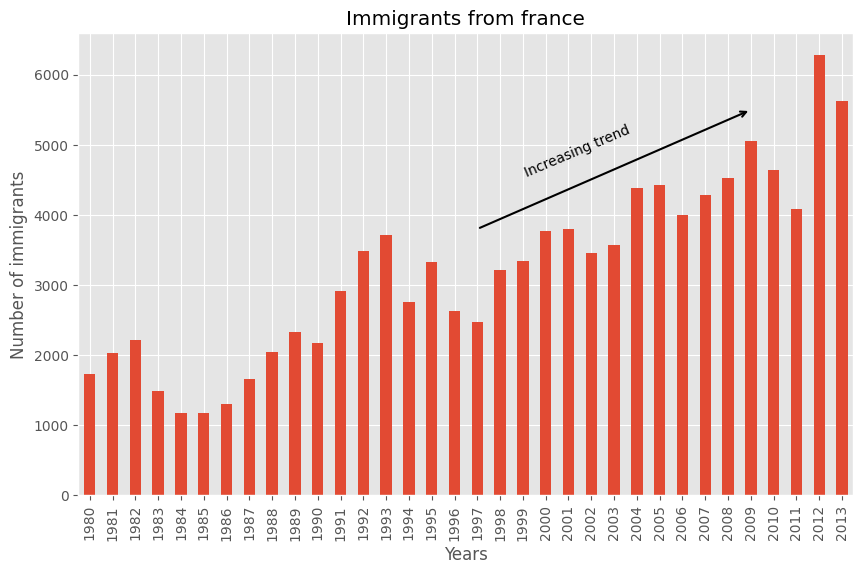

In [365]:
france= df.loc['France', years]
france.plot(kind='bar', figsize=(10,6))
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.title('Immigrants from france')
plt.annotate('Increasing trend',
            xy=(19, 4500),
            rotation=23,
            va='bottom',
            ha='left')
plt.annotate('', 
            xy=(29, 5500),
            xytext=(17, 3800),
            xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=1.5))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Poland'),
  Text(0, 1, 'Republic of Korea'),
  Text(0, 2, 'Sri Lanka'),
  Text(0, 3, 'Iran (Islamic Republic of)'),
  Text(0, 4, 'United States of America'),
  Text(0, 5, 'Pakistan'),
  Text(0, 6, 'Philippines'),
  Text(0, 7, 'United Kingdom of Great Britain and Northern Ireland'),
  Text(0, 8, 'China'),
  Text(0, 9, 'India')])

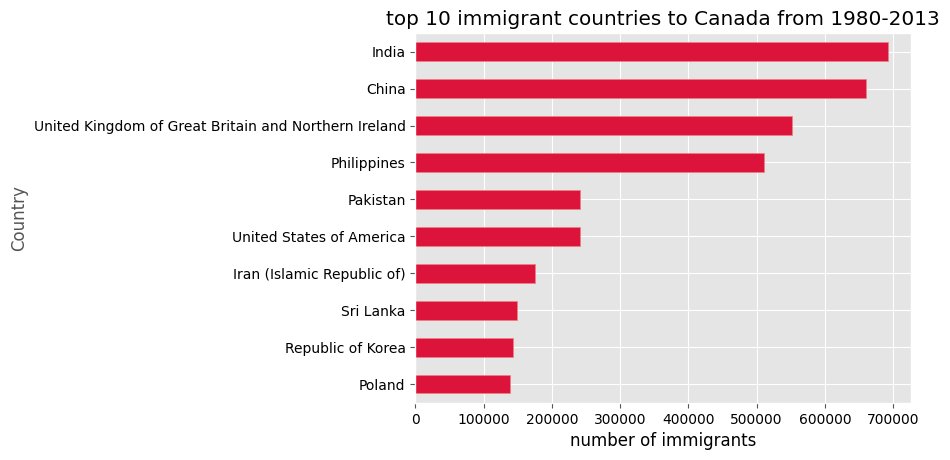

In [366]:
df_top10=pd.DataFrame(df.nlargest(10, 'Total')['Total'].sort_values(ascending=True))
df_top10.plot.barh(legend=False, color='crimson', edgecolor='LightCoral')
plt.title('top 10 immigrant countries to Canada from 1980-2013', color='black')
plt.xlabel('number of immigrants', color='black')
plt.xticks(color='black')
plt.yticks(color='black')

## Questions below

C:\Users\rikar\AppData\Local\Temp\ipykernel_33576\4274324735.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  count = df.groupby('Continent', axis=0).sum()


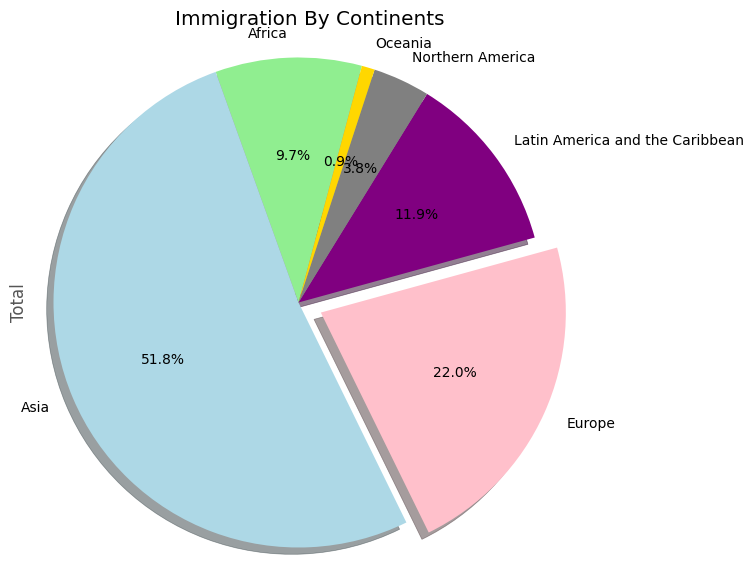

In [367]:
count = df.groupby('Continent', axis=0).sum()

count['Total'].plot(kind='pie', figsize=(7, 7),
                   autopct='%1.1f%%',
                    
                #Adding color, ascending in alphabetic order
                colors = ['lightgreen','lightblue','pink','purple', 'grey', 'gold'],
                
                #Making one wedges of the pie chart to stand ou using explode function, making Europe stand out.
                explode = (0, 0, 0.1, 0,0,0),
                
                #Adding shadow and a starting angel 
                shadow=True, startangle=75)

plt.title('Immigration By Continents')
plt.axis('equal')
plt.show()

           0
1980   99137
1981  110563
1982  104271
1983   75550
1984   73417
   index       0
0   1980   99137
1   1981  110563
2   1982  104271
3   1983   75550
4   1984   73417


<AxesSubplot: xlabel='year', ylabel='amount'>

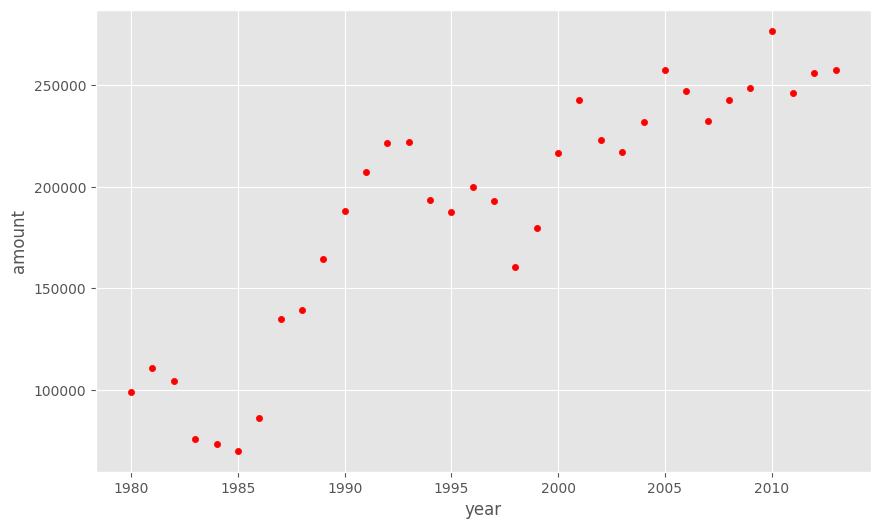

In [368]:
#Make a new datafram that will contain the years as an index and the total number of immigrants each year
totalPerYear = pd.DataFrame(df[years].sum(axis=0))
totalPerYear.head()
print(totalPerYear.head())

#Need to convers the years to integers and polish the dataframe to make it presentable
totalPerYear.index= map(int, totalPerYear.index)
totalPerYear.reset_index(inplace =True)
totalPerYear.head()
print(totalPerYear.head())

totalPerYear.rename(columns={'index':'year', 0:'amount'},inplace=True)

totalPerYear.plot(kind='scatter', x='year', y='amount', figsize=(10,6), color='red')


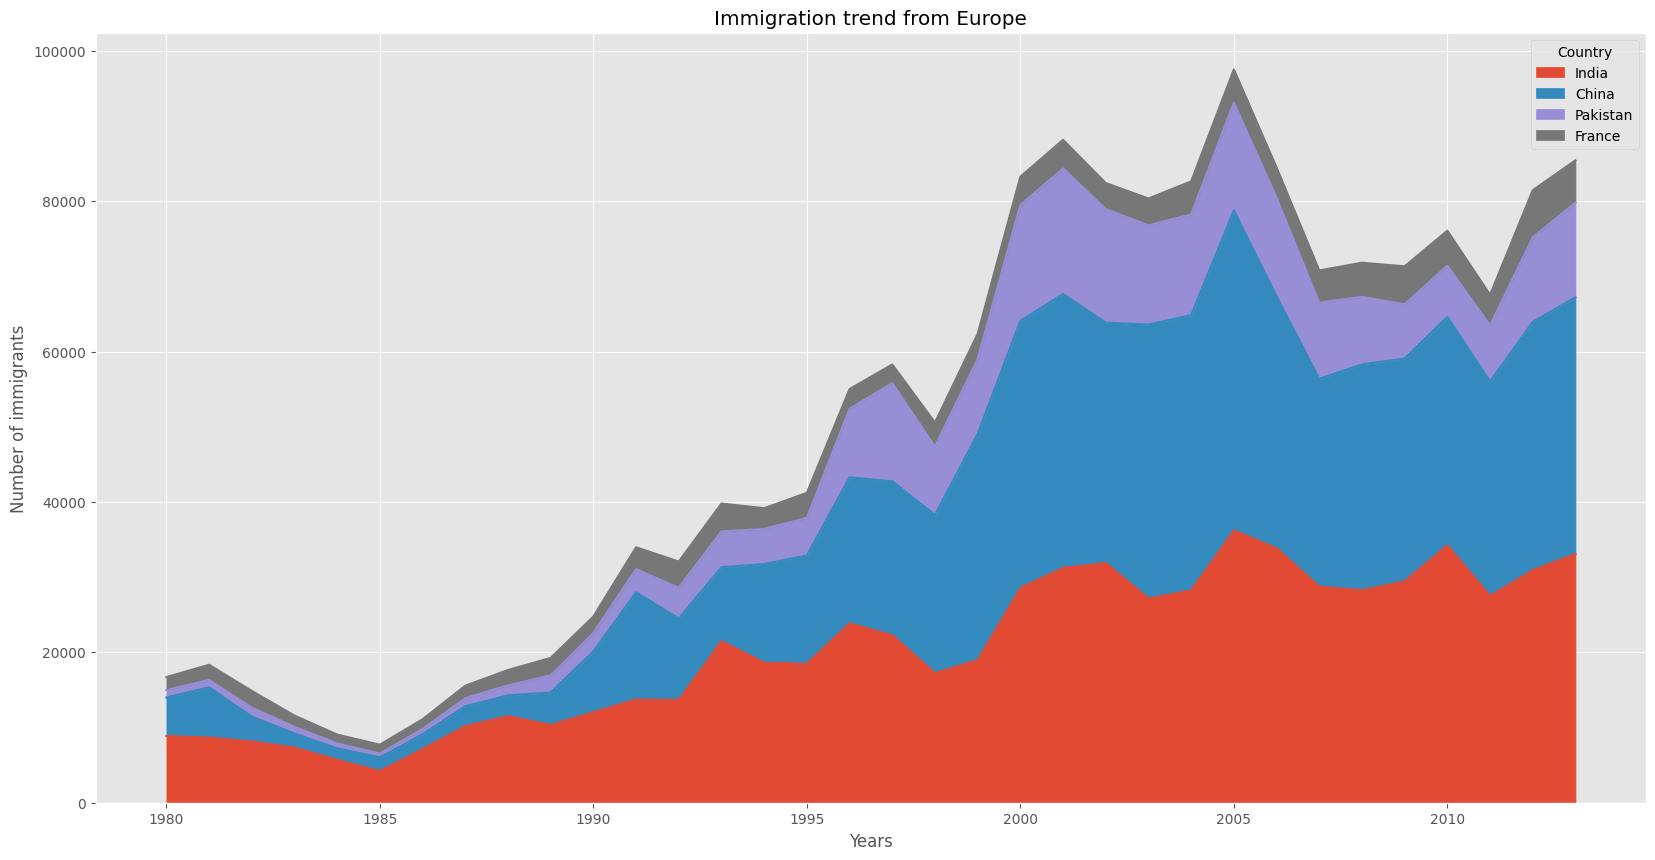

In [369]:
#Make datafram including the information of India, China, Pakistan, and France
top =df.loc[['India', 'China', 'Pakistan', 'France'], years]
top = top.T
##print(top)

colors =['Black', 'Green', 'Blue', 'Red']
top.plot(kind='area', stacked=True, figsize=(20,10))
plt.title('Immigration trend from Europe')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

Text(0.5, 1.0, 'Immigrants from Iceland')

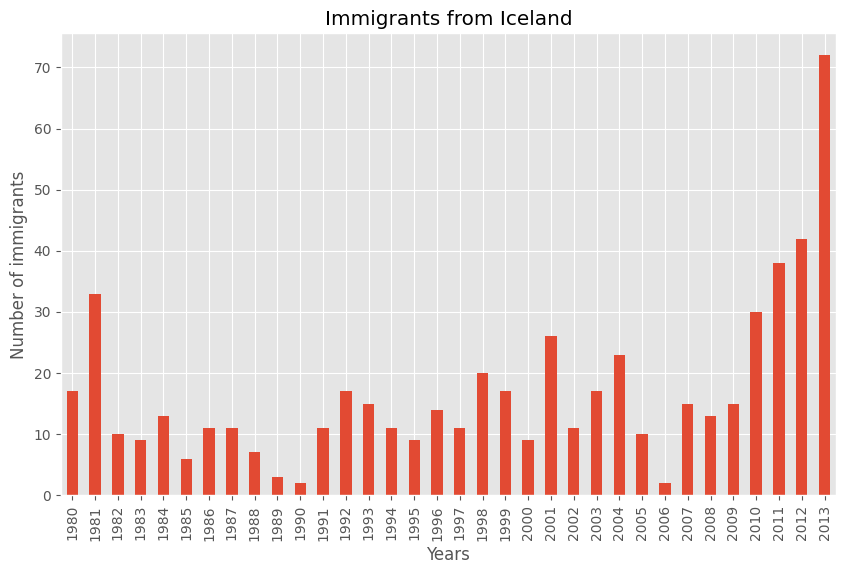

In [370]:
Iceland= df.loc['Iceland', years]
Iceland.plot(kind='bar', figsize=(10,6))
plt.xlabel('Years')
plt.ylabel('Number of immigrants')
plt.title('Immigrants from Iceland')

#The immigration it self is quite low in number, but quite vioulatile when looking at procentage gain and loss.
#When analysing the diagram, we can also see that the amount of immagrants have been increasing every year since the financial crisis in 2008
#thus, assuming the trend, we could assume that the amount of immigrants would increase next year.


In [371]:
df=pd.DataFrame(df.nlargest(15, 'Total')['Total'].sort_values(ascending=True))

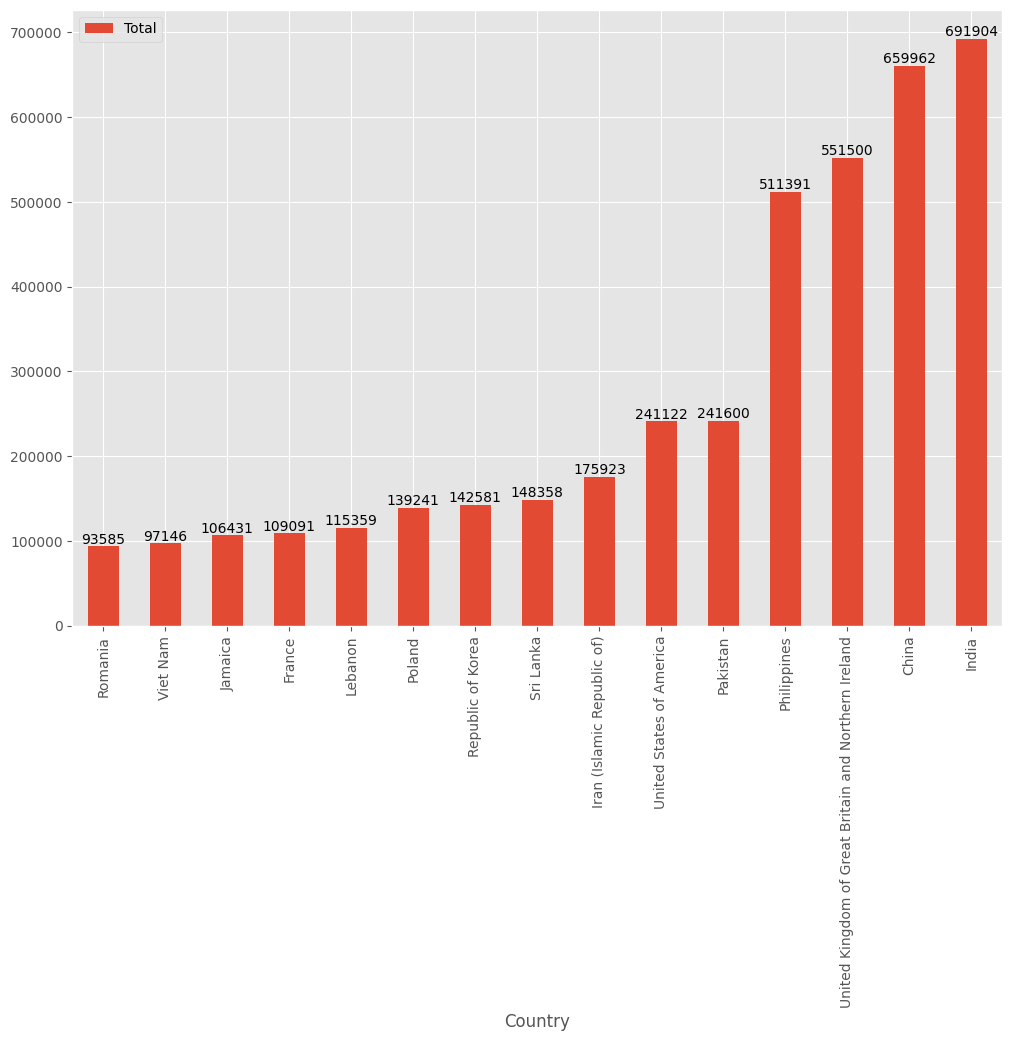

In [372]:
#create grouped bar plot
ax = df.plot.bar(figsize=(12,8))

#annotate bars in bar plot
for container in ax.containers:
    ax.bar_label(container)